# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda)

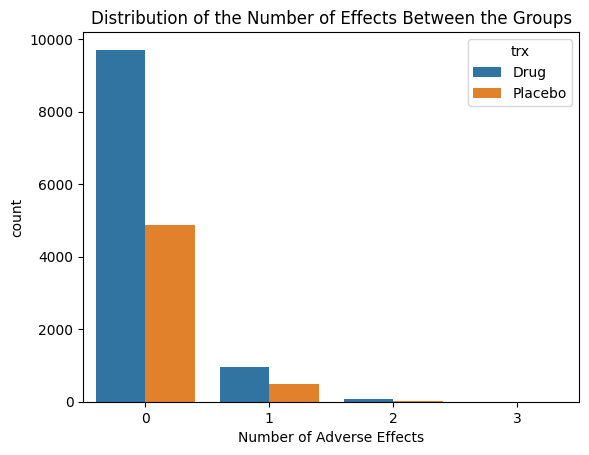

Z-statistic: 0.397
p-value: 0.691
Chi-square statistic: 1.799644342319816
p-value: 0.6150123339426765


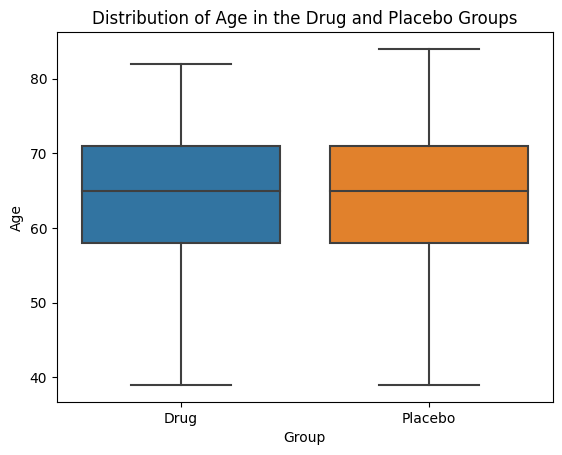

t-statistic: 1.484
p-value: 0.138


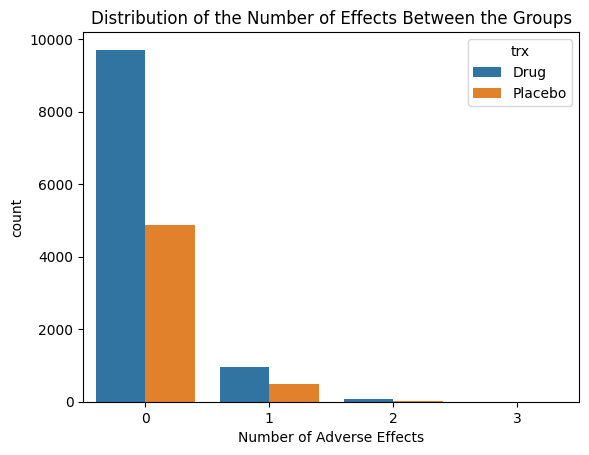

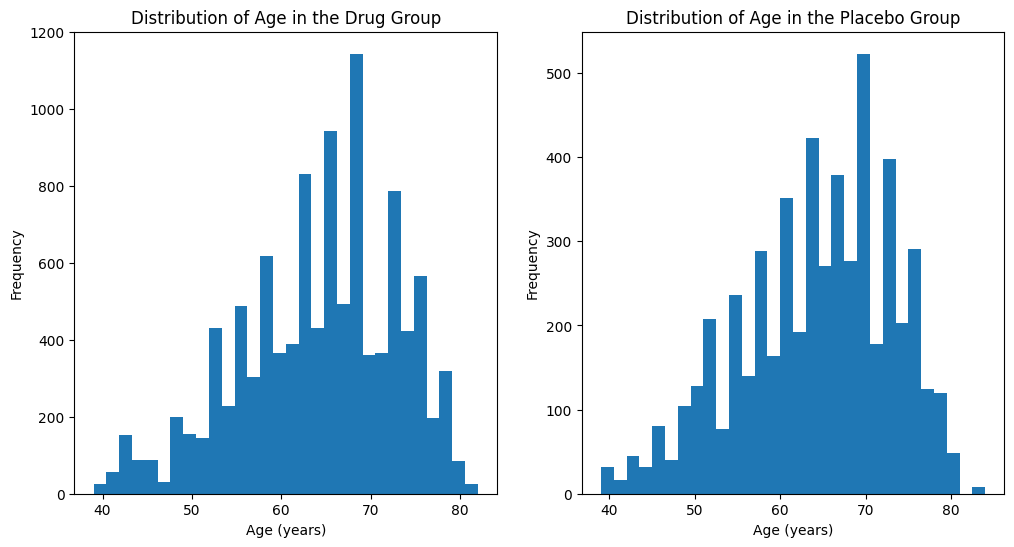

In [8]:
# Import packages
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Create a count plot of num_effects by trx
plot_num_eff = sns.countplot(x="num_effects", hue="trx", data=drug_safety)

# Set the x-axis label and the title
plt.xlabel("Number of Adverse Effects")
plt.title("Distribution of the Number of Effects Between the Groups")

# Show the plot
plt.show()

# Determine if num_effects and trx are independent
expected, observed, stats = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")

# Round the test statistics to three decimal places
stats = stats.round(3)

# Extract the Pearson row as pearson_num_effect_trx
pearson_num_effect_trx = stats[stats["test"] == "pearson"]


# Creating histograms to visualize the distribution of ages by treatment
# Create the plot axes. Increase the figure size
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Set x and y axes labels
xlabel = "Age (years)"
ylabel = "Frequency"

# The Drug group's age distribution
ax1.hist(x="age", data=drug_safety[drug_safety["trx"] == "Drug"], bins=30)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_title("Distribution of Age in the Drug Group")

# The Placebo group's age distribution
ax2.hist(x="age", data=drug_safety[drug_safety["trx"] == "Placebo"], bins=30)
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)
ax2.set_title("Distribution of Age in the Placebo Group")

# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]


# The distributions strongly suggest a
# non-parametric independent samples test.
# Conduct a two-sided Wilcoxon-Mann-Whitney test
# and round to three decimal places
two_ind_samp_results = pingouin.mwu(age_trx, age_placebo).round(3)